# Module-4: Model Selection, Tuning & Boosting
**The Process of choosing the best model that satisfies the requirements needed based on the problem statement is known as a model selection. Tuning the parameters of the model so that it produces the best results is know as model tuning. To do such, we will be required to evaluate the models based on different metrics like R-Square, RMSE, Mean Absolute Error for regressional models and confusion matrix, accuracy score for classification models. We will also be applying the boosting models over the data to get better results**

# Dataset link
https://www.dropbox.com/s/5x30kmnqk9gdfrf/concrete.csv-nv 

https://www.dropbox.com/s/ahfj6zfskjirxel/Depressed.csv-nv 

https://www.dropbox.com/s/cuh3asfjpj9fg:1/housevotes.csv-nv 

https://www.dropbox.com/s/v101n2rodytj5mb/NBA.csv-nv

In [1]:
url1 = 'https://www.dropbox.com/s/5X30kmmqk9gdfrf/concrete.csv-nv'
url2 = 'https://www.dropbox.com/s/ahfj6zfskjirxel/Depressed.csv-nv'
url3 = 'https://www.dropbox.com/s/cuh3asfjpj9fg:1/housevotes.csv-nv'
url4 = 'https://www.dropbox.com/s/v101n2rodytj5mb/NBA.csv-nv'

In [37]:
url5 = 'https://www.kaggle.com/datasets/devvret/congressional-voting-records?select=house-votes-84.csv'

In [38]:
from urllib.request import urlretrieve

In [39]:
import opendatasets as od
od.download(url5)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: priyanshukumar02
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 4.68k/4.68k [00:00<00:00, 471kB/s]

# Scenario-1: Congressional Votes

**Based on 16 key votes identified by COA the data collected has votes each US House of Representatives Congressmen. There are 9 different types of Votes listed by COA voted against, paired against, voted for paired for announced for announced against, voted present, voted present to avoid conflict of interest, and no vote or otherwise**

### Problem Statement:

**Based on the votes given the aim is to classify either a congressman is republican or a democrat Dataset Description:**

**Attributes:**

- Handicapped_infants:(y,n)

* Water_project_cost (y,n)

+ Adoption_budget_resolution (y,n)

- Physician_fee_freeze (y,n)

- El salvador_aid: (y,n)

* Religious_groups_in_schools: (y,n)

- Anti_satellite_test_ban:(y,n)

- Aid_to_nicaraguan_contras (y,n)

* Mx_missile (y,n)

+ Immigration (y,n)

- Synfuels corporation_cutback (y,n)

* Education_spending (y,n)

+ Superfund_right_to_sue (y,n)

* Crime (y,n)

+ Duty_free_exports (y,n)

- Export_south_africa:(y,n}

**Target Variable:**

* Class (republican,democrat)

### Tasks to be Performed:

***In order to attain the above goal below tasks must be performed***

* Read the dataset with no headers, Then put respective columns names. Use pandas_profiling to generate a report of dataset - **Beginner**

* Preprocess the data-**Beginner**

+ Split the data into training and testing set and apply Bernoulli Naive Bayes, logistic regression, random forest, and decision tree models - **Intermediate**

+ Evaluate the models using confusion matrix-**Intermediate**  

- Using LOOCV fit a Logistic Regression model and Bernoulli model, Calculate the average score using accuracy as scoring parameter - **Advanced**

#### Topics Covered:

+ Naive Bayes

+ Logistic Regression

* LOOCV

# Question-1: Read the dataset with no headers; then put respective columns names. Use pandas_profiling to generate a report of dataset.

In [1]:
cols = ['Handicapped infants', 'Water_project_cost', 'Adoption budget_resolution','Physician fee freeze','El salvador_ald', 
        'Religious groups in schools', 'Anti satellite test ban', 'Aid to nicaraguan_contras Mx missile','Immigration', 
        'Synfuels corporation cutback', 'Education spending, Superfund right_to_sue', 'Crime, Duty_free_exports', 
        'Export south africa', 'Target']

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('house-votes-84.csv')
df

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Class Name                               435 non-null    object
 1    handicapped-infants                     435 non-null    object
 2    water-project-cost-sharing              435 non-null    object
 3    adoption-of-the-budget-resolution       435 non-null    object
 4    physician-fee-freeze                    435 non-null    object
 5    el-salvador-aid                         435 non-null    object
 6    religious-groups-in-schools             435 non-null    object
 7    anti-satellite-test-ban                 435 non-null    object
 8    aid-to-nicaraguan-contras               435 non-null    object
 9    mx-missile                              435 non-null    object
 10   immigration                             435 non-null    objec

In [4]:
df.describe(include='all')

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [5]:
from pandas_profiling import ProfileReport
profileReport = ProfileReport(df,title ="Housevotes data Analysis")
profileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.columns

Index(['Class Name', ' handicapped-infants', ' water-project-cost-sharing',
       ' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' el-salvador-aid', ' religious-groups-in-schools',
       ' anti-satellite-test-ban', ' aid-to-nicaraguan-contras', ' mx-missile',
       ' immigration', ' synfuels-corporation-cutback', ' education-spending',
       ' superfund-right-to-sue', ' crime', ' duty-free-exports',
       ' export-administration-act-south-africa'],
      dtype='object')

In [7]:
df.rename(columns={'Class Name':'Target'},inplace=True)

In [8]:
df.reindex([' handicapped-infants', ' water-project-cost-sharing',
       ' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' el-salvador-aid', ' religious-groups-in-schools',
       ' anti-satellite-test-ban', ' aid-to-nicaraguan-contras', ' mx-missile',
       ' immigration', ' synfuels-corporation-cutback', ' education-spending',
       ' superfund-right-to-sue', ' crime', ' duty-free-exports',
       ' export-administration-act-south-africa','Target'],axis=1)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Target
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


In [9]:
df.columns

Index(['Target', ' handicapped-infants', ' water-project-cost-sharing',
       ' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' el-salvador-aid', ' religious-groups-in-schools',
       ' anti-satellite-test-ban', ' aid-to-nicaraguan-contras', ' mx-missile',
       ' immigration', ' synfuels-corporation-cutback', ' education-spending',
       ' superfund-right-to-sue', ' crime', ' duty-free-exports',
       ' export-administration-act-south-africa'],
      dtype='object')

# Pre-processing the data

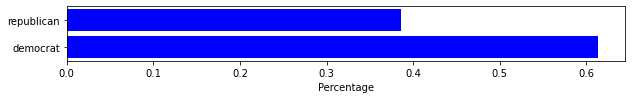

In [10]:
# Target distribution
def target_distribution(df,columns):
    target_ratio=pd.DataFrame({'Counts':df[columns].value_counts(),
                              'Percentage':df[columns].value_counts()/len(df)})
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10,1))
    plt.barh(target_ratio.index,target_ratio.Percentage,color='b')
    plt.xlabel('Percentage')
    plt.show()
target_distribution(df,'Target')

In [11]:
miss = pd.DataFrame({'Col_name':df.columns,
                     'Missing value?':[any(df[x].isnull()) for x in df.columns],
                     'Count':[sum(df[y].isnull()) for y in df.columns],
                     'percentage':[sum(df[y].isnull())/df.shape[0] for y in df.columns]
                    })
miss.sort_values(by='Count',ascending=False)

,Col_name,Missing value?,Count,percentage
0,Target,False,0,0.0
9,mx-missile,False,0,0.0
15,duty-free-exports,False,0,0.0
14,crime,False,0,0.0
13,superfund-right-to-sue,False,0,0.0
12,education-spending,False,0,0.0
11,synfuels-corporation-cutback,False,0,0.0
10,immigration,False,0,0.0
8,aid-to-nicaraguan-contras,False,0,0.0
1,handicapped-infants,False,0,0.0


In [12]:
print('Total Missing values: %s'%sum(miss.Count))

Total Missing values: 0


In [13]:
# dropping duplicate values
#df.drop_duplicates(keep=False, inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
def lb_encode(x):
    lb=LabelEncoder()
    return lb.fit_transform(x)

In [16]:
label_data = df.apply(lb_encode)

In [17]:
label_data.head()

,Target,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,0,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,0,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,0,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


# Question-3: Split the data into training and testing set and apply Bernoulli Naive Bayes, Logistic regression, Random Forest, Decision tree models.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = label_data.drop('Target',axis=1)
y = label_data.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25,random_state=101)

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [21]:
bnb = BernoulliNB(alpha=5)
bnb.fit(X_train,y_train)

BernoulliNB(alpha=5)

In [22]:
lgr = LogisticRegression(C=2)
lgr.fit(X_train,y_train)

LogisticRegression(C=2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
b_pred = bnb.predict(X_test)
l_pred = lgr.predict(X_test)

# Question-4: Evaluate the models using confusion matrix.

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
print('The accuracy of the bernoulli model is:',round(accuracy_score(y_test,b_pred)*100,2))
print('The accuracy of the logistic model is:',round(accuracy_score(y_test,l_pred)*100,2))
print('The accuracy of the random forest model is:',round(accuracy_score(y_test,rf_pred)*100,2))
print('The accuracy of the decision tree model is:',round(accuracy_score(y_test,dt_pred)*100,2))

The accuracy of the bernoulli model is: 60.55
The accuracy of the logistic model is: 96.33
The accuracy of the random forest model is: 98.17
The accuracy of the decision tree model is: 89.91


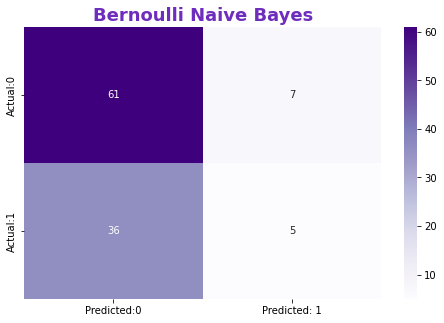

In [29]:
dcm = confusion_matrix(y_test,b_pred)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0', 'Predicted: 1'], 
                          index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(dconf_matrix, annot=True, fmt='d', cmap='Purples') 
fm={'size' :18, 'color': '#6f2dbd', 'weight':'bold'} 
plt.title('Bernoulli Naive Bayes', **fm) 
plt.show()

In [30]:
TN=dcm[0,0]
TP=dcm[1,1]
FN=dcm[1,0]
FP=dcm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN) 
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity) 

True Negative 61
True Positive 5
False Negative 36
False Positive 7
Sensitivity 0.12195121951219512
Specificity 0.8970588235294118


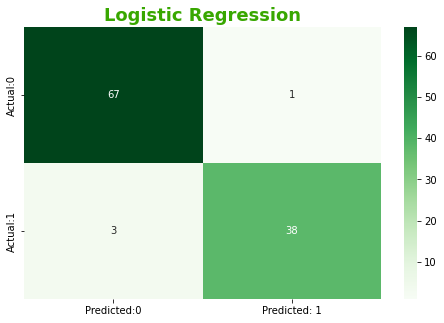

In [31]:
dcm = confusion_matrix(y_test,l_pred)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0', 'Predicted: 1'], 
                          index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(dconf_matrix, annot=True, fmt='d', cmap='Greens') 
fm={'size' :18, 'color': '#38a700', 'weight':'bold'} 
plt.title('Logistic Regression', **fm) 
plt.show()

In [32]:
TN=dcm[0,0]
TP=dcm[1,1]
FN=dcm[1,0]
FP=dcm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN) 
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity) 

True Negative 67
True Positive 38
False Negative 3
False Positive 1
Sensitivity 0.926829268292683
Specificity 0.9852941176470589


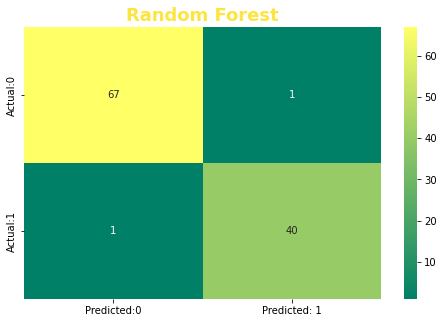

In [33]:
dcm = confusion_matrix(y_test,rf_pred)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0', 'Predicted: 1'], 
                          index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(dconf_matrix, annot=True, fmt='d', cmap='summer') 
fm={'size' :18, 'color': '#FEE440', 'weight':'bold'} 
plt.title('Random Forest', **fm) 
plt.show()

In [34]:
TN=dcm[0,0]
TP=dcm[1,1]
FN=dcm[1,0]
FP=dcm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN) 
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity) 

True Negative 67
True Positive 40
False Negative 1
False Positive 1
Sensitivity 0.975609756097561
Specificity 0.9852941176470589


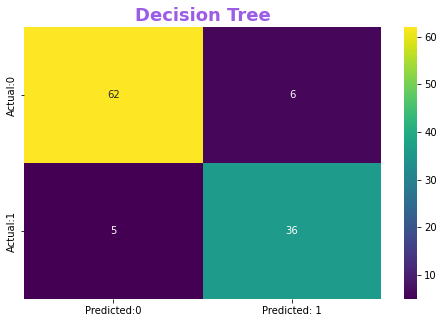

In [35]:
dcm = confusion_matrix(y_test,dt_pred)
dconf_matrix = pd.DataFrame(data=dcm, columns=['Predicted:0', 'Predicted: 1'], 
                          index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(dconf_matrix, annot=True, fmt='d', cmap='viridis') 
fm={'size' :18, 'color': '#9B5DE5', 'weight':'bold'} 
plt.title('Decision Tree', **fm) 
plt.show()

In [36]:
TN=dcm[0,0]
TP=dcm[1,1]
FN=dcm[1,0]
FP=dcm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN) 
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity) 

True Negative 62
True Positive 36
False Negative 5
False Positive 6
Sensitivity 0.8780487804878049
Specificity 0.9117647058823529


In [37]:
from sklearn.metrics import precision_score, classification_report,f1_score, recall_score

In [38]:
print("\t\tClassification Report for Logistic Model") 
print(classification_report(y_test,l_pred))

		Classification Report for Logistic Model
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.97      0.93      0.95        41

    accuracy                           0.96       109
   macro avg       0.97      0.96      0.96       109
weighted avg       0.96      0.96      0.96       109



In [39]:
print("\t\tClassification Report for Bernoulli Naive Bayes Model") 
print(classification_report(y_test,b_pred))

		Classification Report for Bernoulli Naive Bayes Model
              precision    recall  f1-score   support

           0       0.63      0.90      0.74        68
           1       0.42      0.12      0.19        41

    accuracy                           0.61       109
   macro avg       0.52      0.51      0.46       109
weighted avg       0.55      0.61      0.53       109



In [40]:
print("\t\tClassification Report for Random Forest Model") 
print(classification_report(y_test,rf_pred))

		Classification Report for Random Forest Model
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        68
           1       0.98      0.98      0.98        41

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109



In [41]:
print("\t\tClassification Report for Decision Tree Model") 
print(classification_report(y_test,dt_pred))

		Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.86      0.88      0.87        41

    accuracy                           0.90       109
   macro avg       0.89      0.89      0.89       109
weighted avg       0.90      0.90      0.90       109



In [45]:
# Let's see precision and recall values
# Initialize the evaluation dictionary
def initialize_evaluator():
    return {'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1_score':[]}

# Insert data in evaluation dictionary
def insert_data(test,pred,model):
    eval_data=initialize_evaluator()
    eval_data['Model'].append(model)
    eval_data['Accuracy'].append(accuracy_score(test,pred))
    eval_data['Precision'].append(precision_score(test,pred))
    eval_data['Recall'].append(recall_score(test,pred))
    eval_data['F1_score'].append(f1_score(test,pred))
    return eval_data

# Append data of one dictionary to another 
def append_data(data1,data2):
    for i in data1.keys():
        data2[i].extend(data1[i])
    return data2
    

In [46]:
eval_l=insert_data(y_test,l_pred, 'Logistic Regression') 
eval_b=insert_data(y_test,b_pred, 'Bernoulli Naive Bayes') 
eval_rf=insert_data(y_test, rf_pred, 'Random Forest') 
eval_dt=insert_data(y_test, dt_pred, 'Decision Tree') 
eval_all=append_data(eval_l,eval_b)
eval_all=append_data(eval_rf, eval_all)
eval_all=append_data(eval_dt, eval_all)

In [47]:
# Let's Plot the model
from matplotlib.gridspec import GridSpec
def plot_models (data):
    sns.set_palette(sns.color_palette("rocket"))
    super_title={'size':18, 'color':'#c5283d', 'weight':'bold'} 
    sub_title={'size':12, 'color':'#e06777', 'weight':'bold'}
    colors=np.array([[156, 137, 184], [239, 195, 230], [184, 190, 221], [231, 115, 171]])
    colors=colors/255 #Matplotlib RGB color range is from: 0-1
    data=pd.DataFrame(data) 
    fig = plt.figure(figsize=(10,7), constrained_layout=True) 
    gs= GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.barh(data.Model, data.Accuracy, color=colors)
    ax1.tick_params(labelbottom=False, labelleft=True)
    ax1.set_xlim(0,1)
    ax1.set_title('Accuracy', **sub_title)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.barh(data.Model, data.Precision, color=colors)
    ax2.tick_params(labelbottom=False, labelleft=False)
    ax2.set_xlim(0,1)
    ax2.set_title('Precision', **sub_title)
    ax3 =fig.add_subplot(gs[1, 0]) 
    ax3.barh(data.Model, data.Recall, color=colors)
    ax3.tick_params(labelbottom=True, labelleft=True)
    ax3.set_xlim(0,1)
    ax3.set_title('Recall', **sub_title)
    ax4=fig.add_subplot(gs[1, 1])
    ax4.barh(data.Model, data.F1_score, color=colors)
    ax4.tick_params(labelbottom=False, labelleft=False)
    ax4.set_xlim(0,1)
    ax4.set_title('F1 Score',**sub_title)
    fig.suptitle("Evaluation",**super_title)
    ax4.tick_params(labelbottom=True, labelleft=False) 
    plt.show()

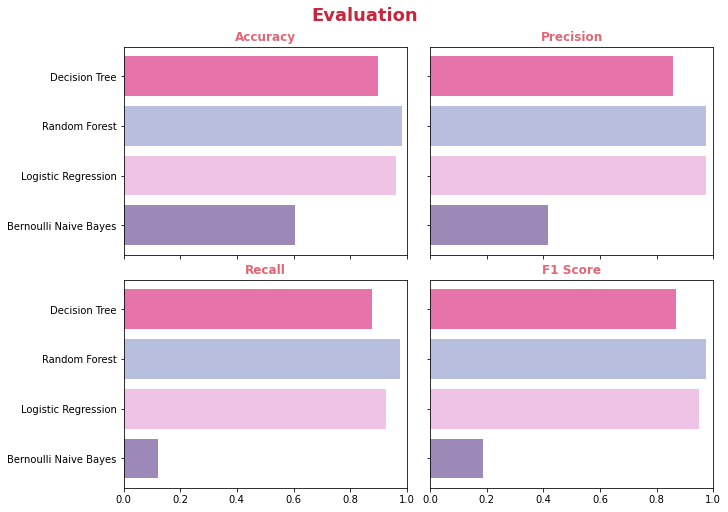

In [49]:
import numpy as np
plot_models(eval_all)

From the above , we can see that our random forest is performing best in every aspect

# Question-5: Using LOOCV fit a Logistic Regression model and Bernoulli model; Calculate the average score using accuracy as scoring parameter.

In [50]:
from sklearn.model_selection import LeaveOneOut 
from sklearn.metrics import accuracy_score,mean_absolute_error

In [53]:
#the Leave one out

loo = LeaveOneOut() 
loo.get_n_splits(X) 
scores=[]
for train_index, test_index in loo.split(X): 
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(C=2)
    model.fit(X_train,y_train)
    scores.append(mean_absolute_error(y_test, model.predict(X_test)))

In [54]:
print('Average Score: %.2f'%np.mean(scores))

Average Score: 0.06


In [59]:
loo = LeaveOneOut() 
loo.get_n_splits(X) 
scores=[]
for train_index, test_index in loo.split(X): 
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = BernoulliNB(alpha=5)
    model.fit(X_train,y_train)
    scores.append(mean_absolute_error(y_test, model.predict(X_test)))

In [60]:
print('Average Score: %.2f'%np.mean(scores))

Average Score: 0.39


**Lets try Random Forest**

In [57]:
loo = LeaveOneOut() 
loo.get_n_splits(X) 
scores=[]
for train_index, test_index in loo.split(X): 
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    scores.append(mean_absolute_error(y_test, model.predict(X_test)))

In [58]:
print('Average Score: %.2f'%np.mean(scores))

Average Score: 0.04


**The above accuracy is due to the fact that the dataset is very small and imbalanced.**